## Analysis and plotting in relation to the article

We first load the simulation results. As some computations can be long for simulations of hundreds of hours (several minutes), we demonstrate the notebook on toy simulations of 50 hours, which are stored in the `/simu` folder. Simulations that were used in section 4.5 of the article (500 hours) are stored in a compressed format in the `/simu_article` folder.

Most of the analysis we do can be done either on several simulations or on a single result. When several simulations are provided, they are considered as independant realizations of the same process and therefore, they are pooled together and the analysis retruns average and standard deviation (in particular, those simulations must cover the same time frame). If only one simulation is used, the analysis returns the value for this single simulation.

If you want to analyze several simulations stored in the folder `/simu`, run the cell below.

In [1]:
import itertools
import visualisation as vis

import numpy as np

# Load simulations results from the folder where they are saved:
folder = "simu"
result = vis.load_multiple_simu(folder)
# result_O is an iterator to save memory in the case.
# result_O['pop'] stores snapshots of the population for times in result['time'].
# result_O['jump'] sµtores every jump that happend during simulation.
# result_0['sizepop'] stores the size of population at snapshot.

If you want to analyze a specific simulation, run the cell below.

In [2]:
#Path to simulation we want to use
simu_path = "simu/new_simu.npz"
simu = vis.load_one_simu(simu_path)

In the following, we will analyze 2 simulations from the `/simu` folder. If you wish to analyze one simulation, just pass the object `simu` defined in the cell above to plotting functions instead of the object `result`, and modify the next cell as such:
```python
#result, result_cp = itertools.tee(result)
types_n, fig_types_n = vis.plot_kind_number(simu)
```

#### Numbers of each cell type 

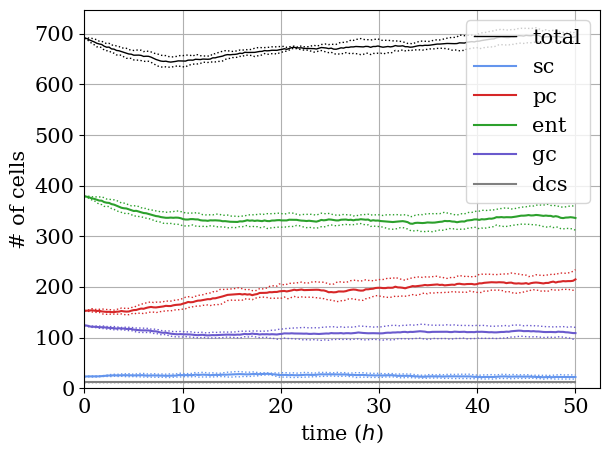

In [11]:
result, result_cp = itertools.tee(result)
types_n, fig_types_n = vis.plot_kind_number(result_cp)

We also want to compute the total number of cells, the number of stem cells, the ratio of progenitors to total cells and the ratio of goblets to enterocytes at final time.

In [12]:
vis.stat_on_kind_number(types_n)

Total number of cells at final time: 694.4 +- 10.150862032359617.
Total number of stem cells at final time: 22.2 +- 4.1182520563948.
Ratio of progenitors to total cells at final time: 0.3097789991060774 +- 0.029409442202721056.
Ratio of goblet cells to enterocytes at final time: 0.32665549712959746 +- 0.04625929754484958.



#### Plot spatial repartition of cells at final time

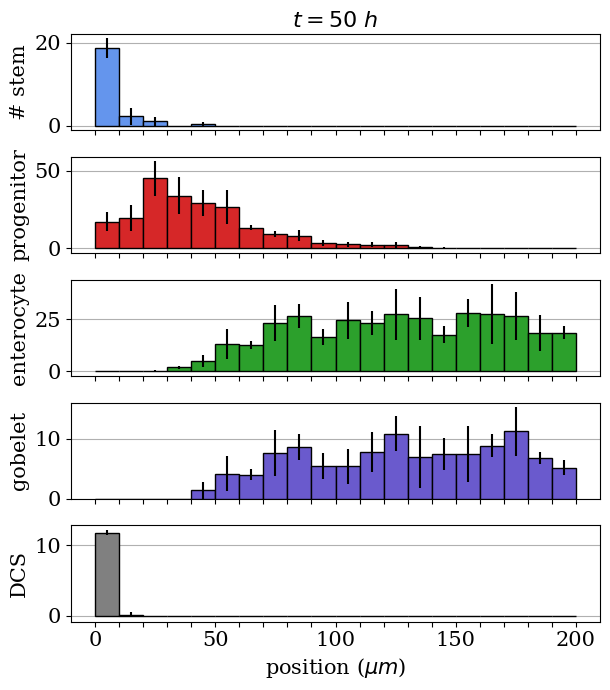

In [13]:
result, result_cp = itertools.tee(result)
spatial_rep,fig_spatial_rep = vis.plot_position(result_cp)

#### Plot cells trajectories and cells lifes

For these plots, we use only one simulation (below `simu_0.npz`).

In [14]:
#Path to simulation we want to use
simu_path = "simu/simu_0.npz"
simu = vis.load_one_simu(simu_path)

We first plot cells trajectories. We don't plot the trajectory of every cells but only a subset of them given by `cells_id` below.

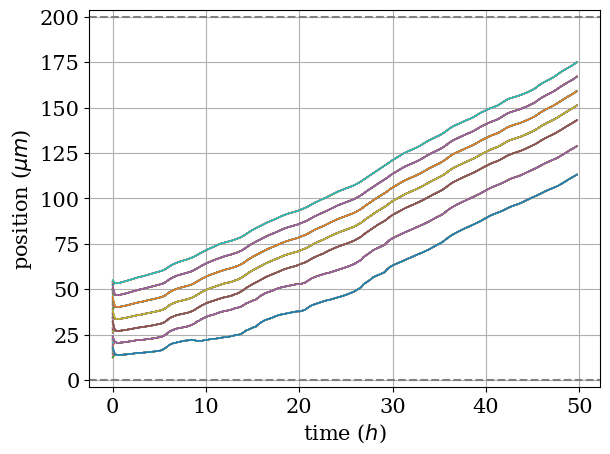

In [15]:
#Subset of cells
cells_id = np.arange(50,200)
foo,foo,fig_traj = vis.plot_cell_trajectory(simu,cells_id)

We now plot the life of a cell and 4 other cells of its progeny. Let us first find a cell having a progeny of size 4 or more. This can be long (indeed, we loop for each cell through all the stochastic jumps until we find a cell with a big enough descendance, and it takes around 20 seconds to check for one cell when the simulation simulated 500 hours).

In [16]:
size_progeny = 4
start_id = 0
cells_id = vis.find_cell_with_progeny_of_size(simu, start_id, size_progeny)

Now we plot the life of cells in the list `cells `.

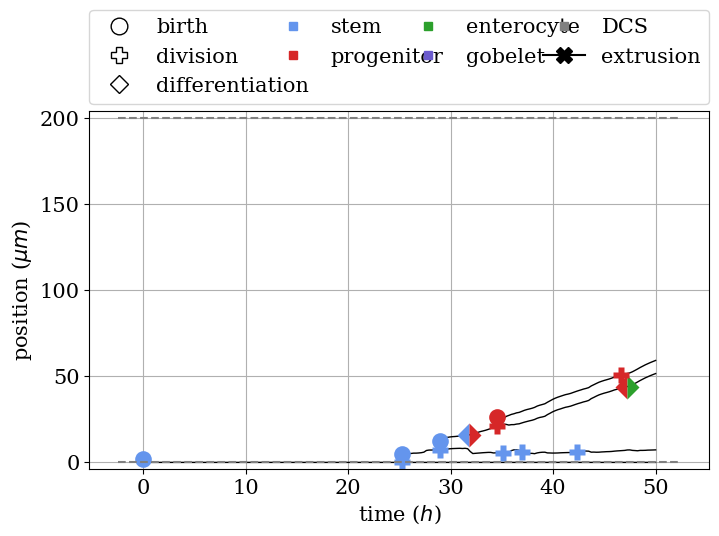

In [17]:
fig_life = vis.plot_celllife(cells_id, simu)

#### Jump spatial repartition

For these plots, we can use again several simulation results loaded from a given folder `folder`. Let first load the results.

In [18]:
# Load simulations results from the folder where they are saved:
folder = "simu"
result = vis.load_multiple_simu(folder)

Then we do the analysis and plotting.

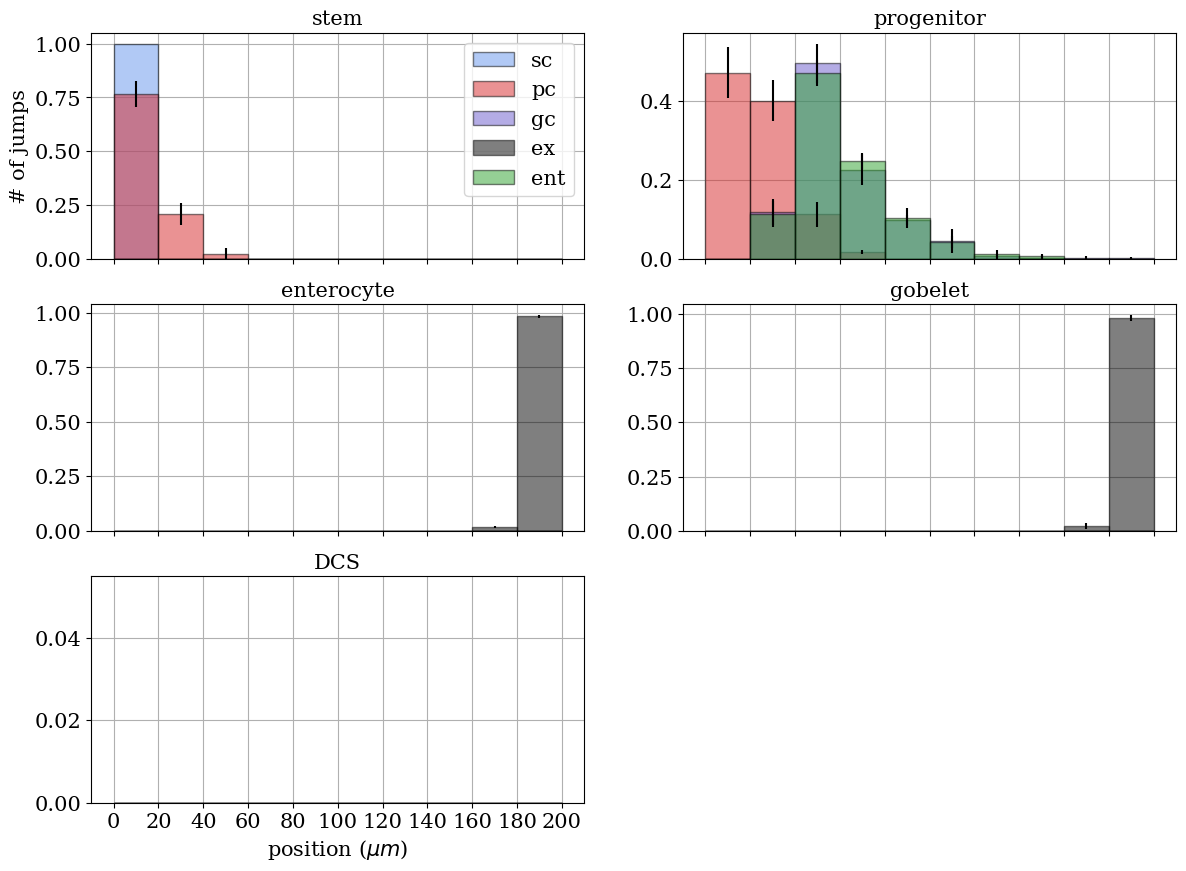

In [19]:
result, result_cp = itertools.tee(result)
foo,fig_jump_spatial = vis.plot_jump_spatial_repartition(result_cp,dens=True)

#### Renewal of the epithelium and jump rates

We mark stem cells and progenitor cells at $T=0~h$ and we track the fraction of the marked cells that are extruded over time. The following comptutation can be quite long (5 minutes for 10 simulations of 500 hours).

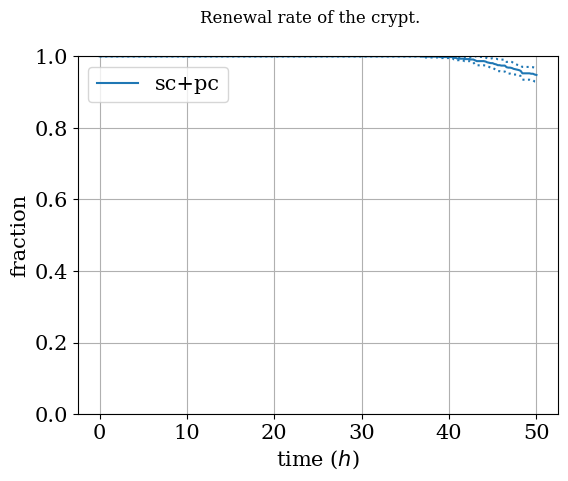

In [20]:
result, result_cp = itertools.tee(result)
foo,fig_turnover = vis.plot_turnover(result_cp, 0., cell_type=(("sc","pc"),))

Now, we compute the event rate for the different events of cell life. We give the example of the rate of stem cell division and progenitor cell division (in $h^{-1}$).

In [21]:
#Rate of stem cell division.
result, result_cp = itertools.tee(result)
r_div_sc = vis.rate_sc_division(result_cp)

#Rate of progenitor cell division
result, result_cp = itertools.tee(result)
r_div_pc = vis.rate_pc_division(result_cp)


Rate of stem cell division: 0.041 +- 0.008.
Rate of progenitor cell division: 0.042 +- 0.002.


/home/ldarriga/these_simuNEPASEFFACER/simu_math/pdmp-model/visualisation.py:1503: UserWarning: This function works only with symetric division event.
  warnings.warn("This function works only with symetric division event.")


#### Concentrations of butyrate and $O_2$.

We plot the concentration at final time of butyrate and $O_2$.

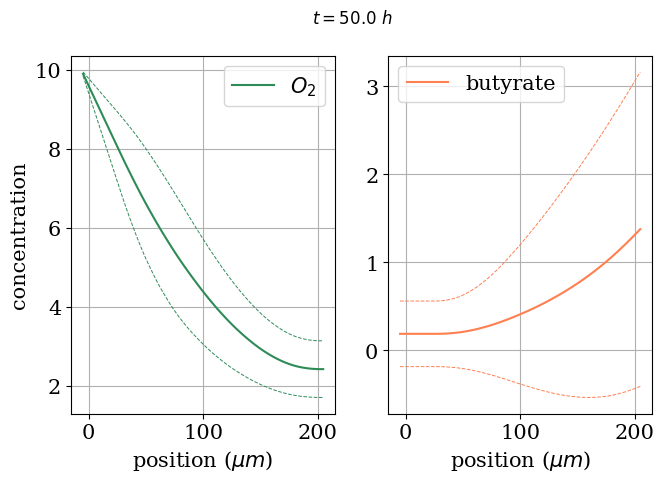

In [22]:
result, result_cp = itertools.tee(result)
fig = vis.plot_concentration_at_t(result_cp)#one can also add an optionnal argument to plot concentration at any time.